In [11]:
import numpy as np
import pandas as pd
import matplotlib

import xgboost
import shap
import numpy as np

# print the JS visualization code to the notebook
shap.initjs()

iohdata = np.load('de-results500.npy')

#[fid, iid, seed, parameters['F'][0], parameters['CR'][0], auc(func.state.current_best.x)]
df = pd.DataFrame(iohdata, columns = ['fid','iid','seed', 'dim', 'F', 'CR', 'auc'])
df['fid'] = df['fid'].astype(int)
df['iid'] = df['iid'].astype(int)
df['seed'] = df['seed'].astype(int)
df

ValueError: Shape of passed values is (18050, 6), indices imply (18050, 7)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 5.00000000e-02
  5.00000000e-02 2.08397259e+02]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 5.00000000e-02
  5.00000000e-02 1.77835210e+02]
 [1.00000000e+00 0.00000000e+00 2.00000000e+00 5.00000000e-02
  5.00000000e-02 2.07058104e+02]
 ...
 [1.00000000e+00 9.00000000e+00 2.00000000e+00 9.50000000e-01
  9.50000000e-01 1.94230907e+02]
 [1.00000000e+00 9.00000000e+00 3.00000000e+00 9.50000000e-01
  9.50000000e-01 7.91925539e+01]
 [1.00000000e+00 9.00000000e+00 4.00000000e+00 9.50000000e-01
  9.50000000e-01 1.72657868e+02]]


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


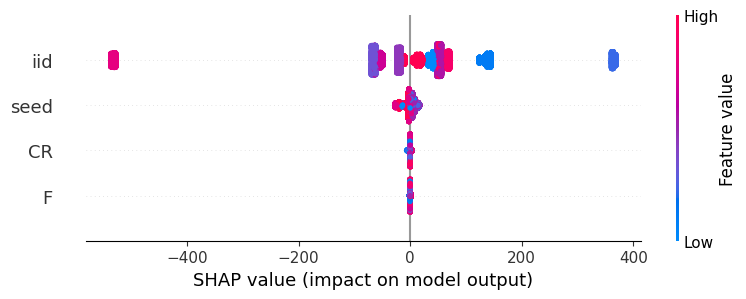

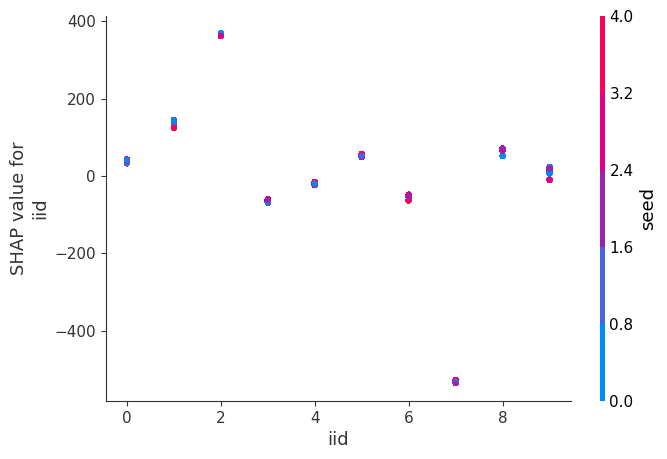

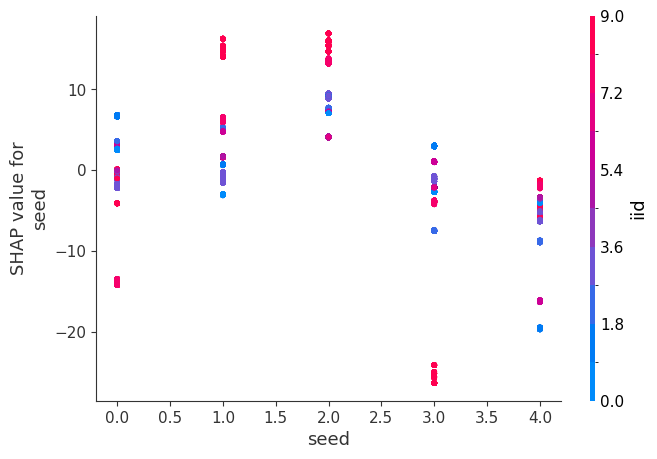

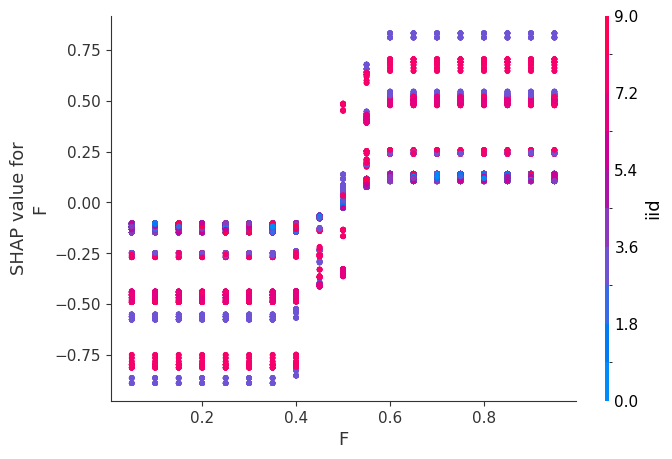

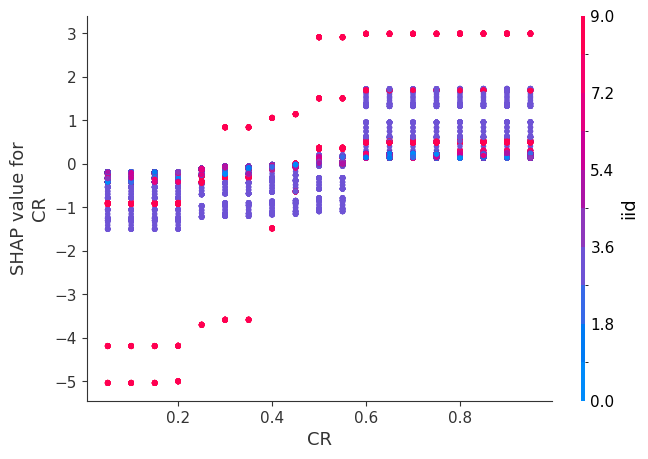

In [9]:
import xgboost

df1 = df[df.fid == 1].to_numpy()
print(df1)

#X = df1[:,1:-1]
X = pd.DataFrame(df1[:,1:-1], columns = ['iid','seed', 'F', 'CR'])
y = df1[:,-1]

# train xgboost model on diabetes data:
bst = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's prediction using SHAP values on the first 1000 training data samples
shap_values = shap.TreeExplainer(bst).shap_values(X)

shap.summary_plot(shap_values, X)

for name in X.columns:
    shap.dependence_plot(name, shap_values, X)